In [ ]:
# Import all the needed packages

import numpy as np 
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


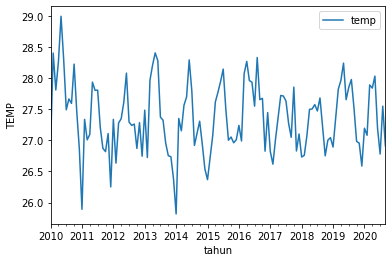

In [ ]:
# Load the data
data = pd.read_csv('temp2010-20.csv', engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
data['tgl']=pd.to_datetime(data['tgl'], format='%Y-%m-%d')
data.set_index(['tgl'], inplace=True)

# Plot the data
data.plot()
plt.ylabel('TEMP')
plt.xlabel('tahun')
plt.show()



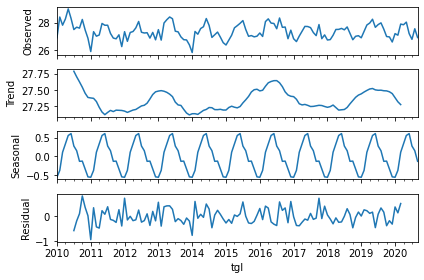

In [ ]:
result = seasonal_decompose(data, 'additive')
result.plot()
plt.show()

In [ ]:
# Determining if the time series is stationary or not
# Running dickey-fuller test on the time series 

result =adfuller(data['temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.108905818270424
p-value: 3.9863002777256187e-10


In [ ]:
# From the above test we conclude the time series is non stationary. 
# Taking the first difference of time series and droping NaN values

data_diff = data.diff().dropna()
result_diff = adfuller(data_diff['temp'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -8.079070213714216
p-value: 1.4781530588445488e-12


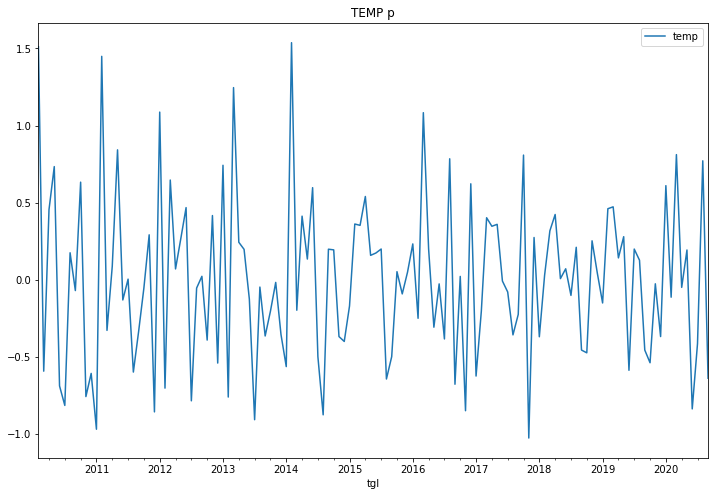

In [ ]:
# Plotting the time series after the first difference

data_diff.plot(figsize = (12,8), title = 'TEMP p')
plt.show()

In [ ]:
# Splitting the data into train and test set
x=data.values
data_train = x[:105]
data_test = x[105:]
len(data_test)

24

In [ ]:
# Finding AIC and BIC 
# Searching the model order with lowest AIC and BIC

import warnings
warnings.filterwarnings('ignore')
for p in range(5):
    
    for q in range(5):
        
        try:
            model = ARIMA(data_train, order = (p,1,q))
            fit_model = model.fit()
            
            print(p,q,fit_model.aic, fit_model.bic)
       
        except:
            print(p,q,None,None)

0 0 176.26885228072155 181.5576340790043
0 1 168.7603085108349 176.69348120825902
0 2 170.48201630052762 181.0595798970931
0 3 154.17753163697026 167.3994861326771
0 4 155.00314816634736 170.86949356119558
1 0 167.81111017143687 175.74428286886098
1 1 169.57977012584385 180.15733372240933
1 2 157.2752629292193 170.49721742492616
1 3 154.57592828223616 170.4422736770844
1 4 156.5741652225232 175.0849015165128
2 0 169.66062172496186 180.23818532152734
2 1 156.69595303329416 169.917907529001
2 2 157.03618788231486 172.9025332771631
2 3 None None
2 4 136.70303160303533 157.85815879616632
3 0 171.03338116983187 184.25533566553872
3 1 None None
3 2 148.72097267770857 167.2317089716982
3 3 None None
3 4 137.62596651196137 161.4254846042337
4 0 171.66981981181337 187.5361652066616
4 1 None None
4 2 150.33855109896191 171.4936782920929
4 3 136.16452093356054 159.9640390258329
4 4 None None


In [ ]:
# Fitting the ARIMA model into the train data set.
# Forecasting the next 60 months production 
model = ARIMA(data_train, order = (4,1,2))
fit_model = model.fit()
forecasted_data = fit_model.forecast(steps = 60)[0]
forecasted_data

array([27.29731056, 27.18956378, 27.176391  , 27.18291389, 27.21203252,
       27.25326909, 27.29403016, 27.32660097, 27.34588299, 27.35088252,
       27.34367924, 27.32835358, 27.30970268, 27.29209799, 27.27869929,
       27.27109031, 27.26931849, 27.27223692, 27.27801018, 27.284644  ,
       27.29042599, 27.29420834, 27.29551132, 27.29446769, 27.29165561,
       27.2878795 , 27.28395517, 27.28054178, 27.27804409, 27.27658853,
       27.27606135, 27.27618655, 27.27661906, 27.27703042, 27.27717166,
       27.27690552, 27.27620877, 27.2751508 , 27.27385835, 27.2724767 ,
       27.27113599, 27.26992825, 27.26889752, 27.26804185, 27.26732425,
       27.2666882 , 27.26607359, 27.26542969, 27.26472335, 27.26394164,
       27.26308988, 27.26218639, 27.26125576, 27.26032248, 27.25940595,
       27.25851775, 27.25766107, 27.25683196, 27.2560218 , 27.2552201 ])

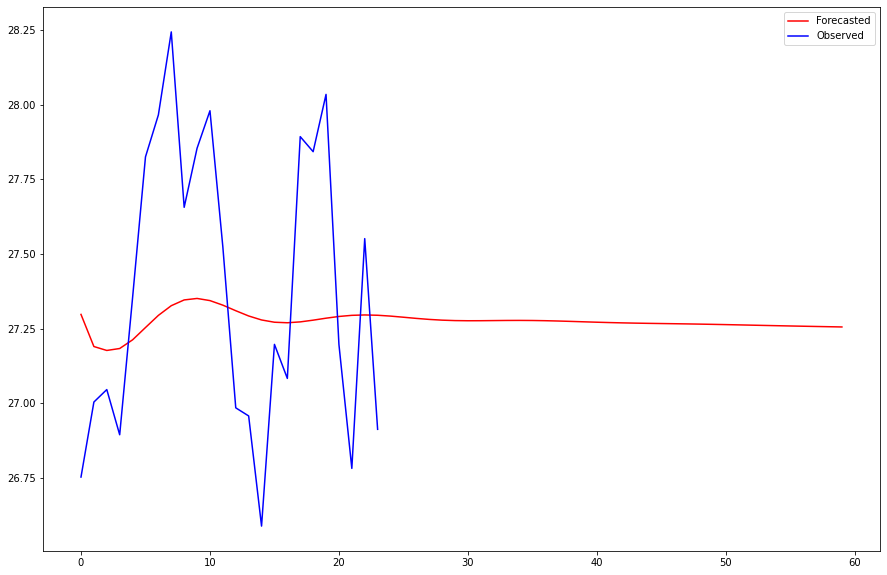

In [ ]:
# Plotting the forecasted data with the actaul test data

plt.figure(figsize=(15,10))
plt.plot(forecasted_data, color='red', label = 'Forecasted')
plt.plot(data_test, color= 'blue', label = 'Observed')
plt.legend()
plt.show()


#SARIMA


In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
# Run the function with the specified arguments to find the best model

sarima_model = pm.auto_arima(data, seasonal = True, m=12,d=1,D=1,start_p=1,start_q=1,start_P=0,max_p=3,max_q=3,
                             trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=154.497, Time=0.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=226.375, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=183.845, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=152.500, Time=0.40 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=180.403, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=173.210, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=200.508, Time=0.16 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=154.498, Time=0.40 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=165.918, Time=0.31 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=155.978, Time=0.99 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=154.322, Time=0.60 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]        

In [ ]:
# Fitting the model

sarima_model.fit(data_train)


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# Making the prediction based on the fitted SARIMA model

future_forecast = sarima_model.predict(n_periods=87)

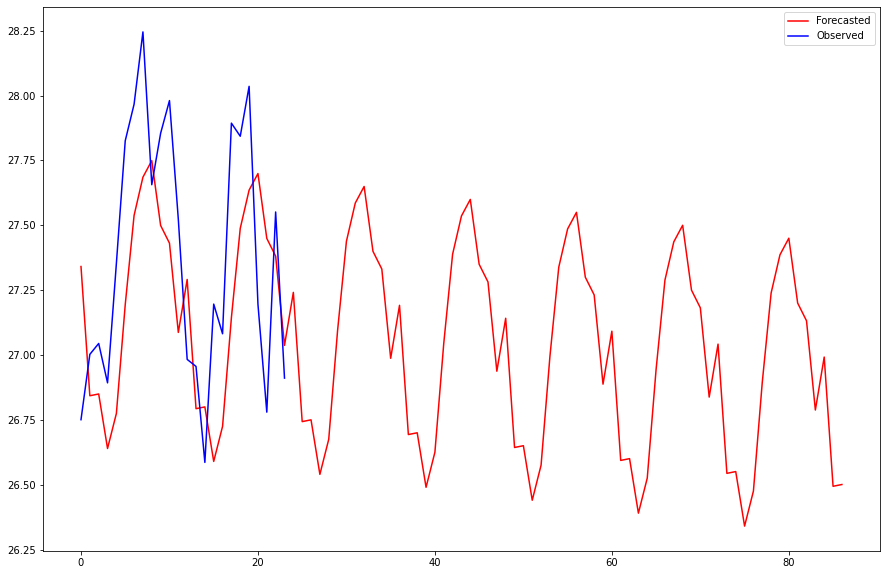

In [ ]:
# Plotting the predicted data

plt.figure(figsize=(15,10))
plt.plot(future_forecast, color='red', label = 'Forecasted')
plt.plot(data_test,color='blue', label = 'Observed')
#plt.plot(data_train,color='green', label = 'train')
plt.legend()
plt.show()

#print(data_train)
#print(data_test)
#print(future_forecast)

In [ ]:
date = pd.date_range(start="2018-10-1",end="2025-12-31", freq='M')

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -61.604
Date:                            Sat, 12 Jun 2021   AIC                            129.208
Time:                                    17:57:48   BIC                            136.774
Sample:                                         0   HQIC                           132.262
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7438      0.073    -10.171      0.000      -0.887      -0.600
ma.S.L12      -0.7360      0.133     -5.524      0.000      -0.997      -0.475
sigma2         0.2001      0.028      7.065      0.000       0.145       0.256
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                13.88
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.73
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(future_forecast, columns=["ch"], index=date)

,ch
2018-10-31,27.341530
2018-11-30,26.843854
2018-12-31,26.850645
2019-01-31,26.640683
2019-02-28,26.775701
2019-03-31,27.194639
2019-04-30,27.538413
2019-05-31,27.685645
2019-06-30,27.749451
2019-07-31,27.499675


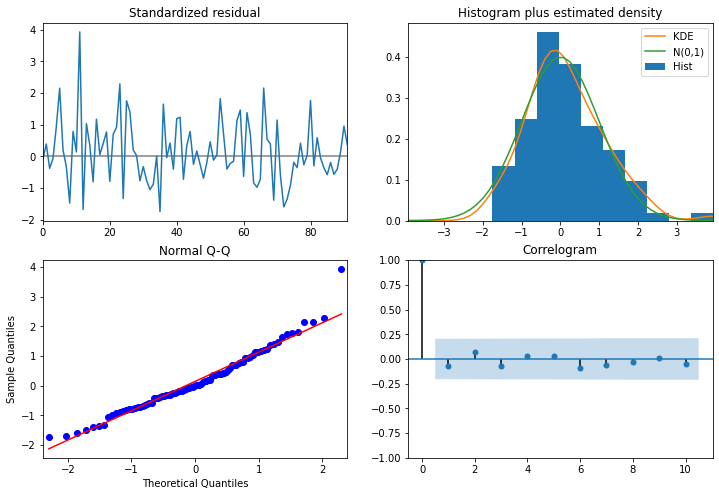

In [ ]:
# plotting the model diagnostics

sarima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [ ]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(data_test,future_forecast[:24], squared=False)
mape = MAPE(data_test,future_forecast[:24])
print("rms :",rms)
print("MAPE :",mape)

rms : 0.43701930217801
MAPE : 1.8793475234794552


In [ ]:
def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    #rms_error = np.round(rmse(y1, y2),1)
    
    #map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms, "%MAPE": mape}, ignore_index=True)
    
    return accuracy_df

accuracy(data_test,future_forecast[:24])

,%MAPE,RMSE
0,1.879348,0.437019
